# Indian Crimes Data Analysis

### Loading the dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\chand\\Downloads\\data analysis project\\crime_dataset_india.csv")

###  Getting basic Info

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         40160 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB
None


### Checking for missing values

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used               0
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64


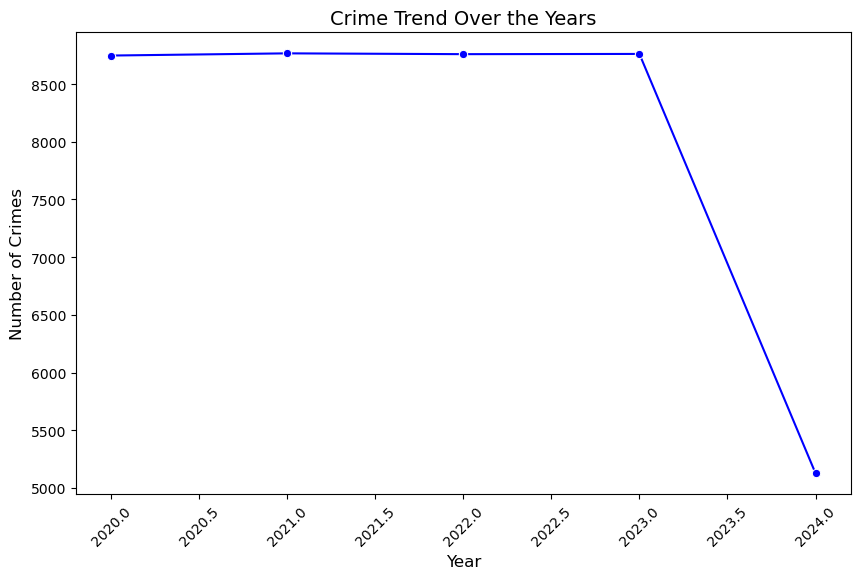

In [6]:
df['Year'] = pd.to_datetime(df['Date Reported'], errors='coerce').dt.year

plt.figure(figsize=(10, 6))
crime_by_year = df["Year"].value_counts().sort_index()
sns.lineplot(x=crime_by_year.index, y=crime_by_year.values, marker="o", color="b")
plt.title("Crime Trend Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.show()

 Crime rates fluctuate over the years, with some years experiencing spikes. 
There could be policy changes, law enforcement efforts, or socio-economic factors affecting crime trends.

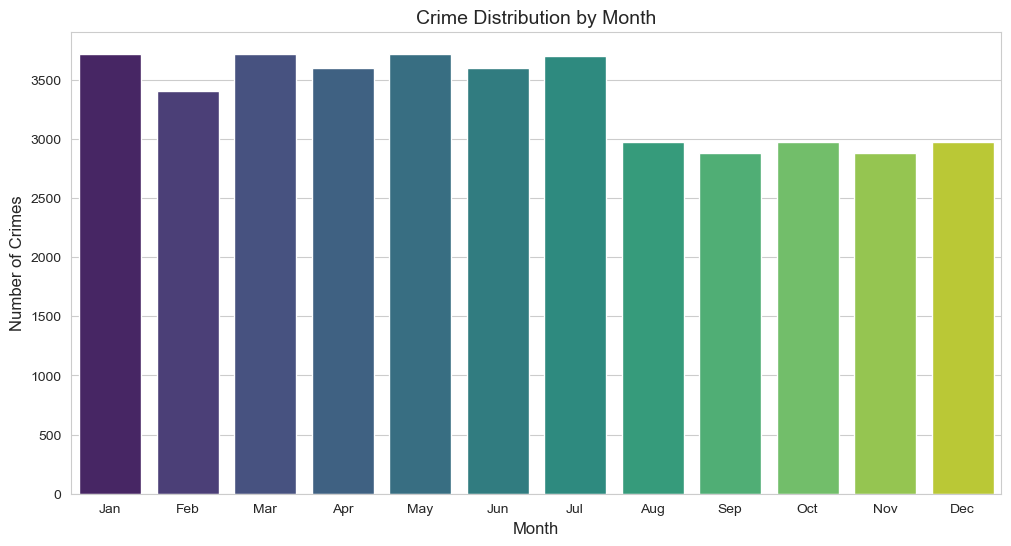

In [11]:
df["Date of Occurrence"] = pd.to_datetime(df["Date of Occurrence"], format="%d-%m-%Y %H:%M", errors="coerce")

df["Month"] = df["Date of Occurrence"].dt.month

crime_by_month = df["Month"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=crime_by_month.index, y=crime_by_month.values, palette="viridis")

# Labels and Title
plt.title("Crime Distribution by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Show the plot
plt.show()


Certain months experience higher crime rates, indicating possible seasonal crime patterns.
The spike in crimes could be linked to festive periods, vacations, or economic factors.
Law enforcement agencies should increase security measures during peak months to prevent crime surges.

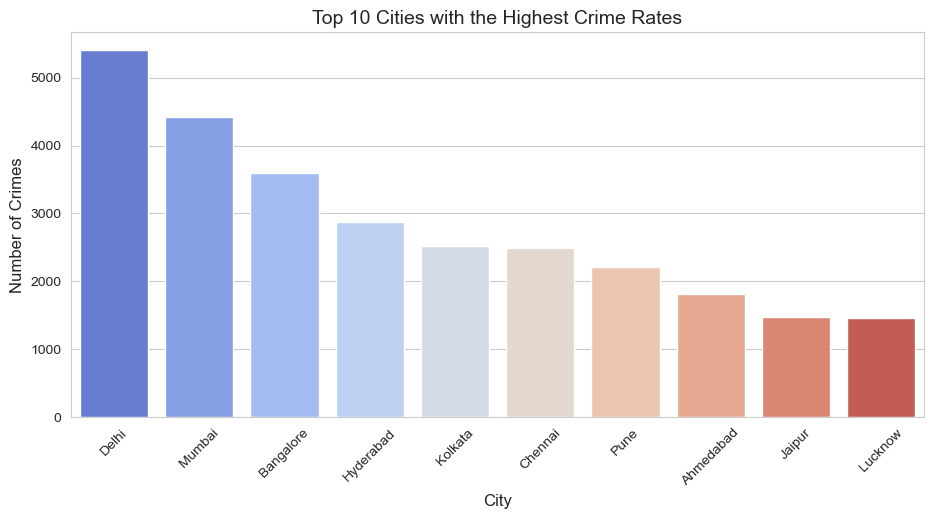

In [23]:
plt.figure(figsize=(11, 5))
top_cities = df["City"].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")
plt.title("Top 10 Cities with the Highest Crime Rates", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.show()

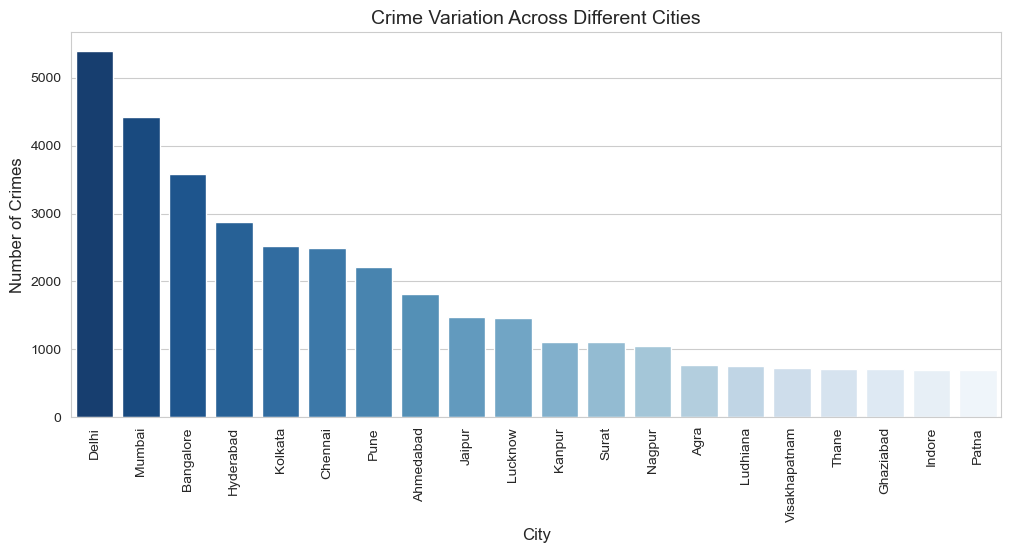

In [21]:
plt.figure(figsize=(12, 5))
city_crime_distribution = df["City"].value_counts().nlargest(20)  # Top 20 for better visualization
sns.barplot(x=city_crime_distribution.index, y=city_crime_distribution.values, palette="Blues_r")
plt.title("Crime Variation Across Different Cities", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=90)
plt.show()

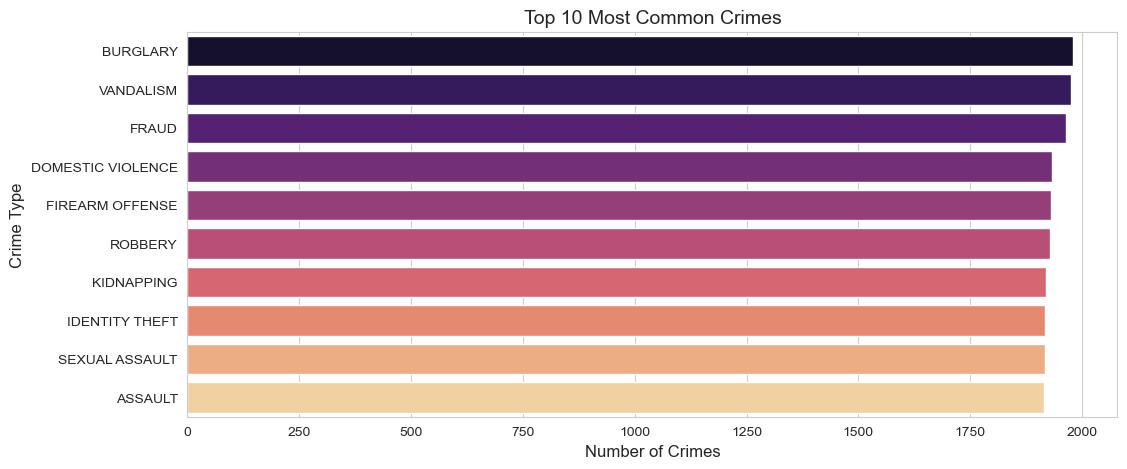

In [20]:
plt.figure(figsize=(12, 5))
top_crimes = df["Crime Description"].value_counts().nlargest(10)
sns.barplot(y=top_crimes.index, x=top_crimes.values, palette="magma")
plt.title("Top 10 Most Common Crimes", fontsize=14)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)
plt.show()

 Certain crimes occur more frequently, suggesting they might be easier to commit or harder to control.
Law enforcement strategies should prioritize high-frequency crimes.

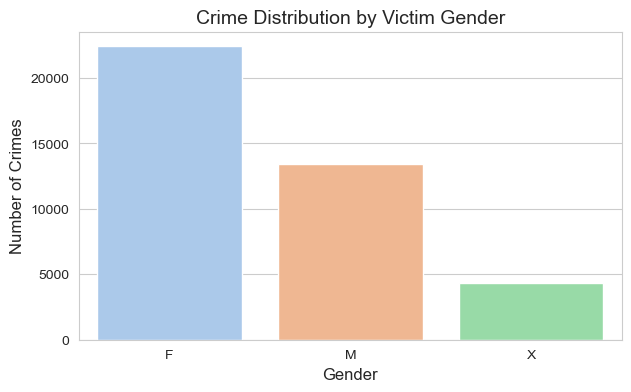

In [19]:
gender_counts = df["Victim Gender"].value_counts()

plt.figure(figsize=(7, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title("Crime Distribution by Victim Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

plt.show()


Females are the most affected group, possibly due to gender-based crimes like domestic violence, harassment, or assault.
Males also face significant crime rates, often related to violent crimes or robberies.
The "X" category (Other/Unknown) suggests cases where gender is not specified or belongs to non-binary individuals.

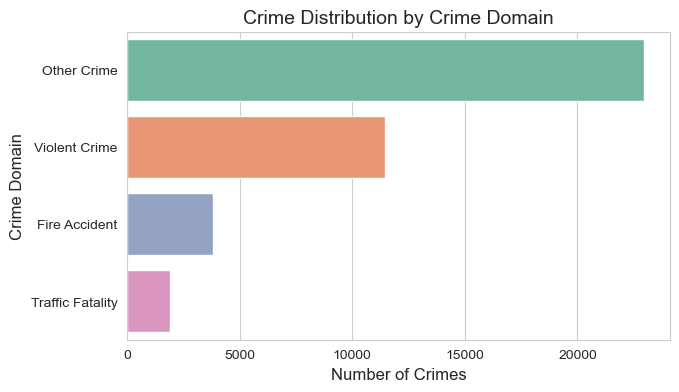

In [24]:
plt.figure(figsize=(7, 4))
crime_domain_counts = df["Crime Domain"].value_counts()
sns.barplot(y=crime_domain_counts.index, x=crime_domain_counts.values, palette="Set2")
plt.title("Crime Distribution by Crime Domain", fontsize=14)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Crime Domain", fontsize=12)
plt.show()

Violent crimes have a major presence, requiring stricter law enforcement.
Property crimes (e.g., theft, burglary) are also prevalent.
Strategies should be designed based on crime type prevalence.

Case Closure Count:
 No     20098
Yes    20062
Name: Case Closed, dtype: int64


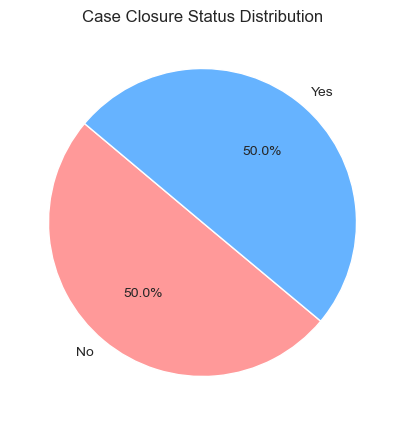

In [29]:
case_status_counts = df["Case Closed"].value_counts()
print("Case Closure Count:\n", case_status_counts)

plt.figure(figsize=(5, 5))
colors = ["#ff9999", "#66b3ff"] 
plt.pie(case_status_counts, labels=case_status_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title("Case Closure Status Distribution")
plt.show()